In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 72% 157M/218M [00:00<00:00, 1.64GB/s]
100% 218M/218M [00:00<00:00, 1.08GB/s]


In [6]:
## Unzip
import zipfile
zip_red = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_red.extractall('/content')
zip_red.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [8]:
# generators

train_df = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_df = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [9]:
# Normalize

def process(image,labels):
  image = tf.cast(image/255. ,tf.float32)
  return image,labels

train_df = train_df.map(process)
validation_df = validation_df.map(process)

In [10]:
## Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_df, epochs=10, validation_data=validation_df)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 115ms/step - accuracy: 0.5553 - loss: 4.0242 - val_accuracy: 0.5240 - val_loss: 0.8915
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.5548 - loss: 0.7515 - val_accuracy: 0.5462 - val_loss: 0.6967
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.5973 - loss: 0.6767 - val_accuracy: 0.5902 - val_loss: 0.6588
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.5935 - loss: 0.6661 - val_accuracy: 0.6016 - val_loss: 0.6654
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6305 - loss: 0.6506 - val_accuracy: 0.5808 - val_loss: 0.7849
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.6497 - loss: 0.6045 - val_accuracy: 0.6629 - val_loss: 0.6103
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7137 - loss: 0.5394 - val_accuracy: 0.6668 - val_loss: 0.6125
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.7355 - loss: 0.5296 -

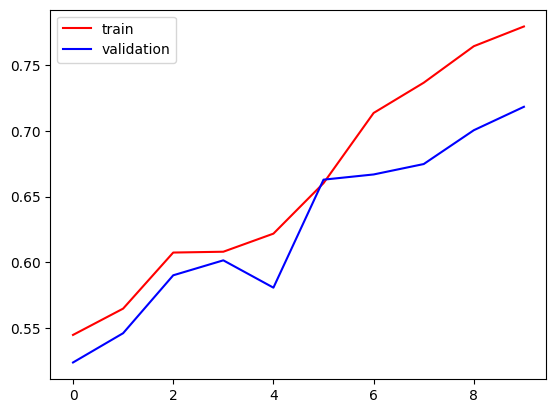

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

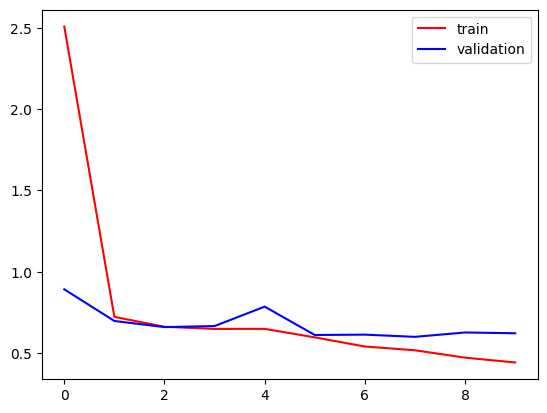

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [65]:
import numpy as np
from PIL import Image

class_labels = ['Cat', 'Dog']

try:

    img_path = '/content/cat.jpg'


    img = Image.open(img_path)


    img = img.resize((256, 256))


    img_array = np.array(img)


    if img_array.ndim == 2:

        img_array = np.stack((img_array,) * 3, axis=-1)


    elif img_array.shape[2] == 4:

        img_array = img_array[:, :, :3]


    img_array = img_array / 255.0


    img_array = np.expand_dims(img_array, axis=0)


    print(f"Image shape after processing: {img_array.shape}")


    pred = model.predict(img_array)


    probability = pred[0][0]


    if probability > 0.5:
        class_index = 1
    else:
        class_index = 0

    predicted_label = class_labels[class_index]


    print(f"\nRaw prediction value: {probability:.6f}")
    print(f"Predicted class: {predicted_label} (Index: {class_index})")

except FileNotFoundError:
    print(f"Error: The file at '{img_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Make sure your 'model' variable is loaded and the image file is a valid format (JPG, PNG, etc.).")

Image shape after processing: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Raw prediction value: 0.397217
Predicted class: Cat (Index: 0)
